# Image filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [2]:
path = 'F:\DEV\IMN\TP1\dev2.jpg'

In [3]:
# read a jpg image file
A = cv.imread(path)

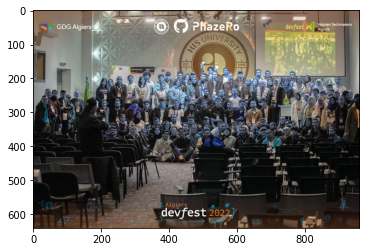

In [4]:
# show the image
plt.imshow(A)
plt.show()

2. Add a noise A of type poivre et sel, then a guassian noise using imnoise

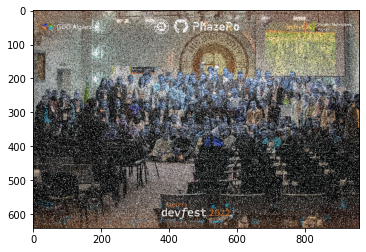

In [9]:
# add a noise of poivre et sel to the image
def add_noise_poivre_sel(image, proba):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - proba
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < proba:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
ps = add_noise_poivre_sel(A, 0.1)
# show the image
plt.imshow(ps)
plt.show()    

Adding a guassian noise to the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


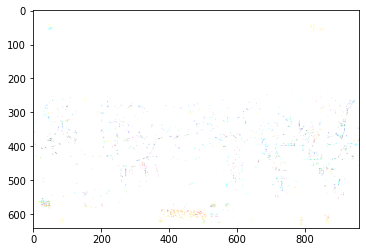

In [30]:
# add a noise of gaussien to the image
def add_noise_gaussien(image, mean, sigma):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return noisy
# il faut jouer sur la moyenne et l'ecart type pour avoir un bon resultat
g = add_noise_gaussien(A, 0, 0.1)
# show the image
plt.imshow(g)
plt.show()

3. Filtering the images with a medina filter

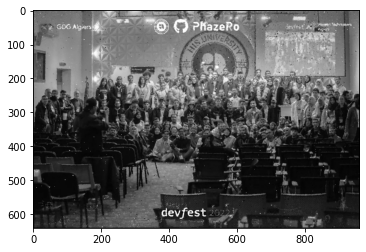

In [31]:
# filter these images with a median filter
def median_filter(image):
    output = np.zeros(image.shape, np.uint8)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            output[i][j] = np.median(image[i-1:i+2, j-1:j+2])
    return output
# show the image
plt.imshow(median_filter(ps))
plt.show()

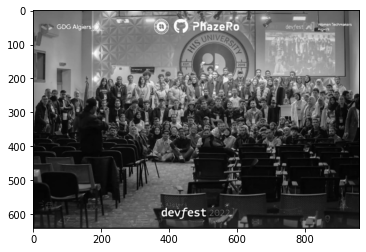

In [32]:
plt.imshow(median_filter(g))
plt.show()

We notice that the gaussian image was harder to restore than the poivre et sel using the median filter

#### Filtering the images with a low-pass filter

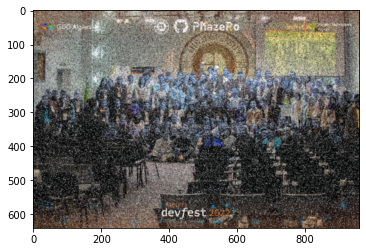

In [28]:
# filter these images with a low pass filter
def low_pass_filter(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((3, 3), np.float32) / 9
    output = cv.filter2D(image, -1, kernel)
    return output
# show the image
plt.imshow(low_pass_filter(ps))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


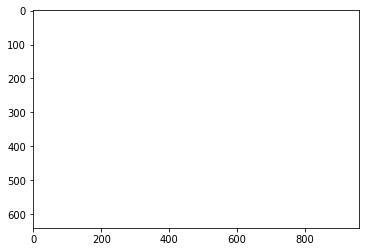

In [33]:
plt.imshow(low_pass_filter(g))
plt.show()

4. Apply a high pass filter with and without the mean

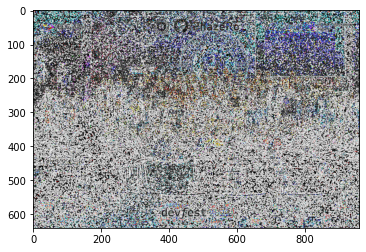

In [34]:
# Apply a high pass filter to the image with mean filter
def high_pass_filter(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((3, 3), np.float32) / 9
    output = cv.filter2D(image, -1, kernel)
    output = image - output
    return output
# show the image
plt.imshow(high_pass_filter(ps))
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


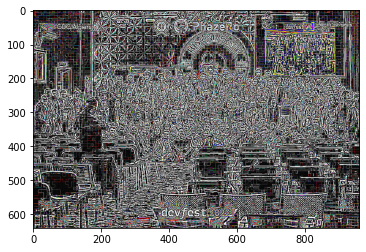

In [35]:
plt.imshow(high_pass_filter(g))
plt.show()

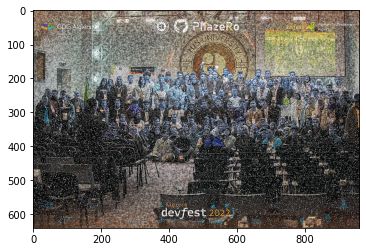

In [36]:
# Apply a high pass filter to the image without mean filter
def high_pass_filter2(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    output = cv.filter2D(image, -1, kernel)
    return output
# show the image
plt.imshow(high_pass_filter2(ps))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


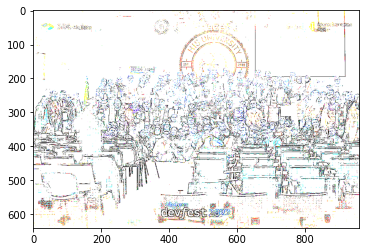

In [37]:
plt.imshow(high_pass_filter2(g))
plt.show()

    The filter without the mean is doing slightly better then the high pass filter with the mean

5. Apply the accentuator filter

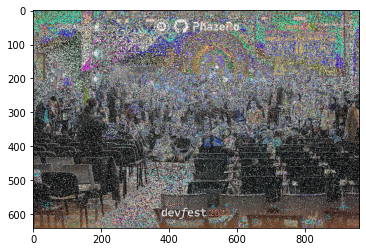

In [38]:
# Apply the accentuator filter to the image
def accentuator_filter(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    output = cv.filter2D(image, -1, kernel)
    output = image + output
    # the difference is in the + while above we have -
    return output
# show the image
plt.imshow(accentuator_filter(ps))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


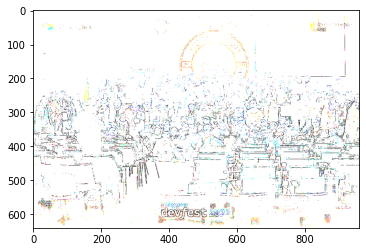

In [39]:
plt.imshow(accentuator_filter(g))
plt.show()

6. Apply an erosion using another elemnt than the window 

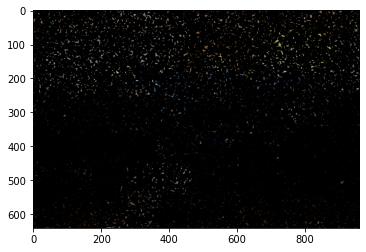

In [40]:
# Apply an erosion using a structure element other than the window  3*3
def erosion(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((5, 5), np.uint8)
    output = cv.erode(image, kernel, iterations=1)
    return output
# show the image
plt.imshow(erosion(ps))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


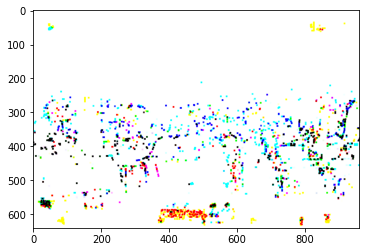

In [41]:
plt.imshow(erosion(g))
plt.show()

Use the dilatation without the 3*3 window

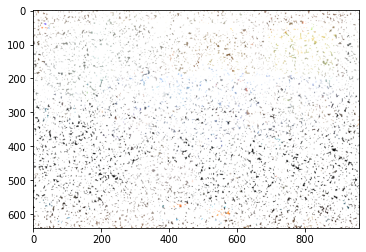

In [42]:
# Use the dilatation without the 3*3 window
def dilatation(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((5, 5), np.uint8)
    output = cv.dilate(image, kernel, iterations=1)
    return output
# show the image
plt.imshow(dilatation(ps))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


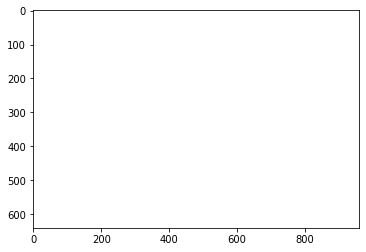

In [43]:
plt.imshow(dilatation(g))
plt.show()

In [ ]:
path_cameraman = 'F:\DEV\IMN\TP1\cameraman.jpg'
img_cam = cv.imread(path_cameraman)
plt.imshow(img_cam)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


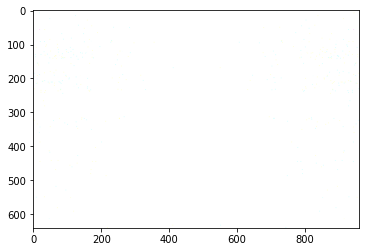

In [45]:
# Find the fourier transform of the image cameraman, show the module image and the argument
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    # count the phase spectrum
    phase_spectrum = np.angle(fshift)
    return magnitude_spectrum, phase_spectrum
# show the image
magnitude_spectrum, phase_spectrum = fourier_transform(img_cam)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


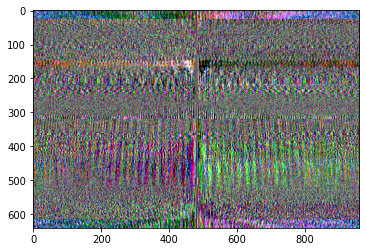

In [46]:
plt.imshow(phase_spectrum, cmap = 'gray')
plt.show()

8. Find the fourier transform of the image trui

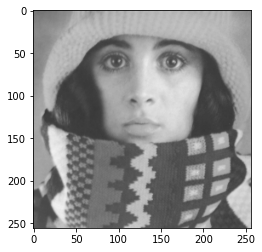

In [59]:
# find the fourier transform of the image trui
path_trui = "trui.png"
img_trui = cv.imread(path_trui)
plt.imshow(img_trui)

C:\Users\pc\AppData\Local\Temp\ipykernel_8620\2095180133.py:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


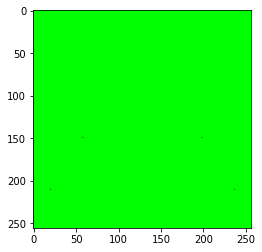

In [61]:
# show the module image
magnitude_spectrum_trui, phase_spectrum_trui = fourier_transform(img_trui)
plt.imshow(magnitude_spectrum_trui, cmap = 'gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


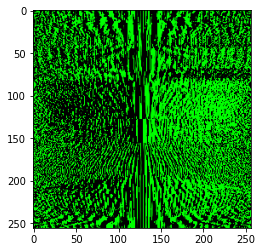

In [57]:
# show the argument image
plt.imshow(phase_spectrum_trui, cmap = 'gray')
plt.show()

9. Construct a third image that has a module equal to that of the image cameraman and an argument of trui

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


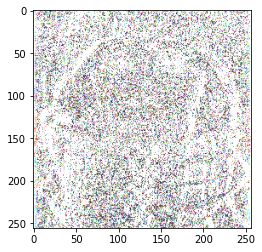

In [66]:
# Construct a third image that has a module equal to that of the image cameraman and an argument of trui
def construct_image(magnitude_spectrum, phase_spectrum):
    # we use the magnitude spectrum of the cameraman image and the phase spectrum of the trui image
    # they should have the same size
    # fix the size of the phase spectrum
    phase_spectrum = phase_spectrum[0:magnitude_spectrum.shape[0], 0:magnitude_spectrum.shape[1]]
    # fix the size of the magnitude spectrum
    magnitude_spectrum = magnitude_spectrum[0:phase_spectrum.shape[0], 0:phase_spectrum.shape[1]]
    fshift = magnitude_spectrum * np.exp(1j*phase_spectrum)
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
# show the image
img_back = construct_image(magnitude_spectrum, phase_spectrum_trui)
plt.imshow(img_back, cmap = 'gray')

10. Generate the fourier transorm of a low pass filter with the same size as cameraman, apply this filter to the image in the frequential domain

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


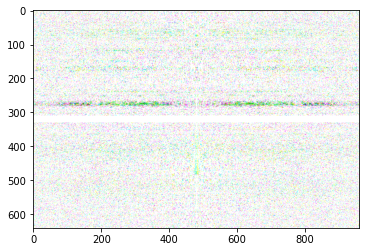

In [86]:
# Generate the fourier transorm of a low pass filter with the same size as cameraman
def low_pass_filter_fourier(image, frequency):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols,ch = image.shape
    crow, ccol = int(rows/2), int(cols/2)
    fshift[crow-frequency:crow+frequency, ccol-frequency:ccol+frequency] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
# apply the low pass fourier filter to the cameraman image in the frequential domain
res = low_pass_filter_fourier(magnitude_spectrum, 310)
plt.imshow(res, cmap = 'gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


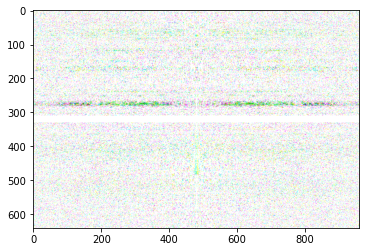

In [84]:
# low pass filter fourier transform
def low_pass_filter_fourier2(image, frequency):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols,ch = image.shape
    crow, ccol = int(rows/2), int(cols/2)
    fshift[crow-frequency:crow+frequency, ccol-frequency:ccol+frequency] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
# apply the low pass fourier filter to the cameraman image in the frequential domain
res = low_pass_filter_fourier2(magnitude_spectrum, 310)
plt.imshow(res, cmap = 'gray')
plt.show()